In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [7]:
import cupy as cp

In [8]:
PROJECT_PATH = '../'
DATA_DIR = "/home/swei20/LV/data/"
PCA_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/pca/spectra.h5'
NORM_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux_step4.h5"
sys.path.insert(0, PROJECT_PATH)

### Load data

In [9]:
with h5py.File(NORM_PATH, 'r') as f:
    flux0 = f['flux'][()]
    para0 = f['para'][()]
    wave0 = f['wave'][()]

In [10]:
flux0.shape, wave0.shape

((116614, 3850), (3850,))

In [11]:
from lv.base.dataloader_c import DataLoader

In [14]:
ds = DataLoader()

In [15]:
ds.prepare_data (flux0, wave0, para0, "M", "F", "T45", "L02", fix_CO=0)

Cupy flux: 7000, wave: 949


# find masking 

In [16]:
u,w,v = ds._svd(ds.flux)

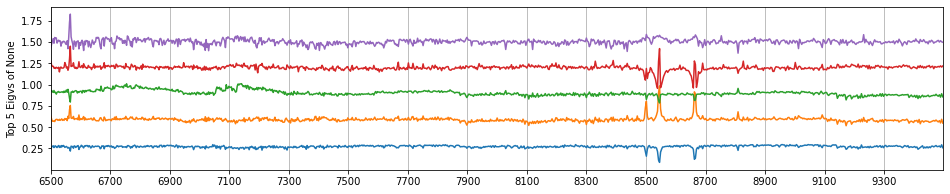

In [17]:
ds.plot_eigv(cp.asnumpy(v))

In [18]:
k,q,prom = 100, 0.6, 0.2
nvv= ds.get_peaks(k=k,q=q,prom=prom, out=1)

Text(0.5, 1.0, 'k=100, q=0.6, prom=0.2')

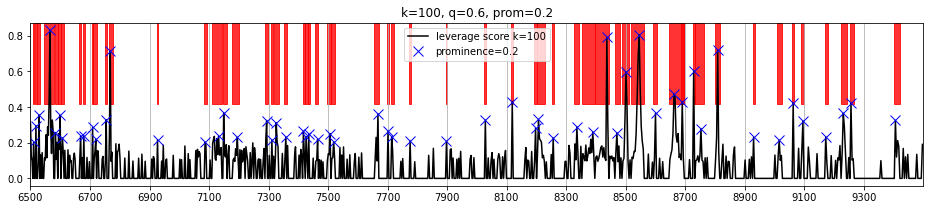

In [19]:
ds.plot_peaks(nvv, k, prom)
plt.title(f"k={k}, q={q}, prom={prom}")

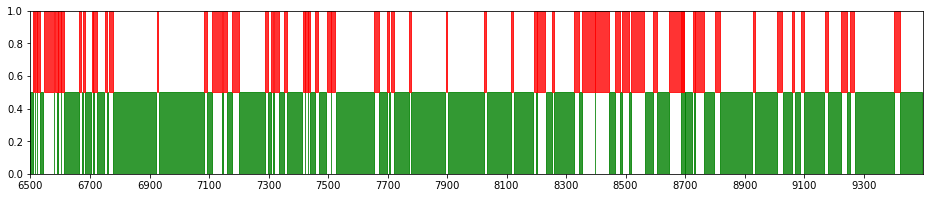

In [20]:
ds.plot_MN_mask()

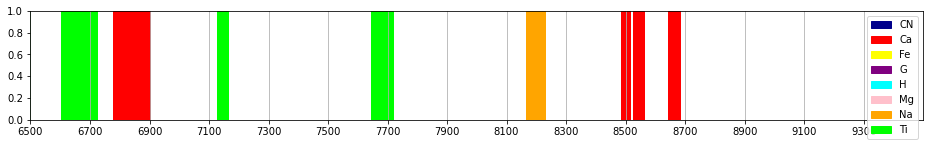

In [21]:
ds.plot_lick()

In [22]:
ds.get_MN(ds.mask, top=5)

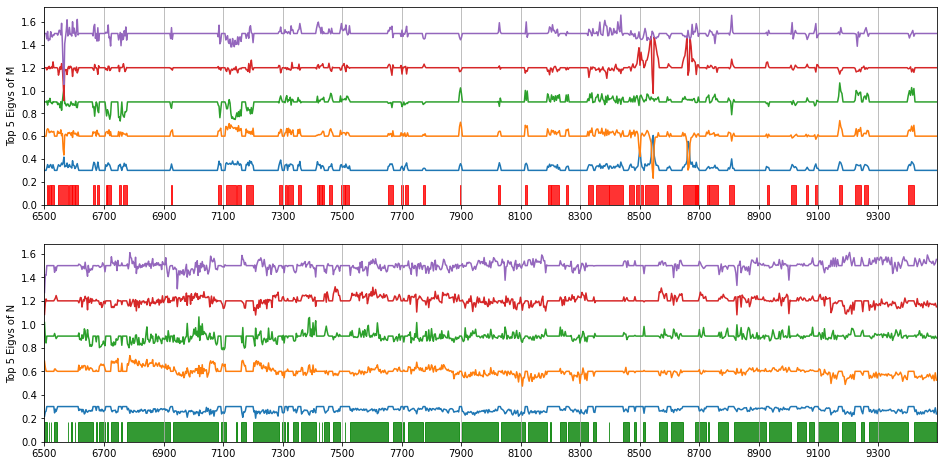

In [23]:
f, axs = plt.subplots(2,1,figsize=(16,8), facecolor="w")
ds.plot_MN(step=0.3, axs=axs)

In [24]:
ML, MS, MLv, MSv = ds._pcp(ds.M, delta=1e-6, mu=None, lam=None, norm=None, maxiter=1000)

9.809707 0.011952286093343936 42929.07


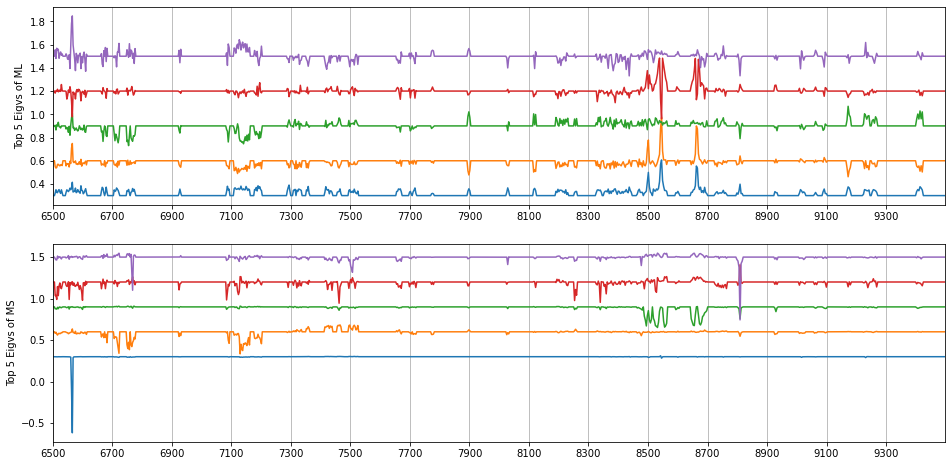

In [55]:
f, axs = plt.subplots(2,1,figsize=(16,8), facecolor="w")
ds.plot_eigv(MLv, name="ML", ax=axs[0])
ds.plot_eigv(MSv, name="MS", ax=axs[1])

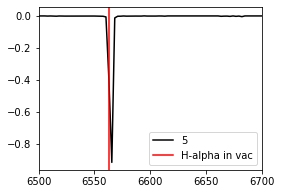

In [74]:
f,ax = plt.subplots(1, figsize=(4,3))
ds.plot_v(MSv, 0, nidx=5,ax = ax, c="k")
ax.axvline(6562.8,color="r", ymin=0,ymax=1, label="H-alpha in vac")
plt.xlim(6500,6700)
plt.legend()

In [54]:
MSv.shape

(5, 949)

(6565.0, 6570.0)

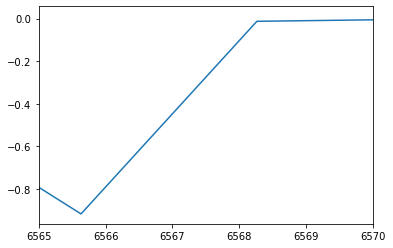

In [59]:
plt.plot(ds.nwave, cp.asnumpy(MSv[0]))
plt.xlim(6565,6570)

In [26]:
NL, NS, NLv, NSv = ds._pcp(ds.N, delta=1e-6, mu=None, lam=None, norm=None, maxiter=1000)

7.5221076 0.011952286093343936 35660.89


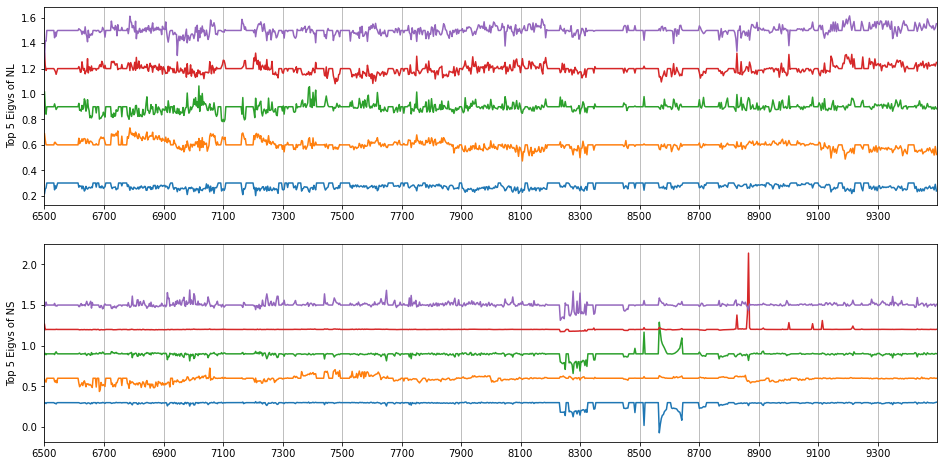

In [27]:
f, axs = plt.subplots(2,1,figsize=(16,8), facecolor="w")
ds.plot_eigv(NLv, name="NL", ax=axs[0])
ds.plot_eigv(NSv, name="NS", ax=axs[1])

In [28]:
ds.pcp_transform(MLv, MSv, NLv, NSv)

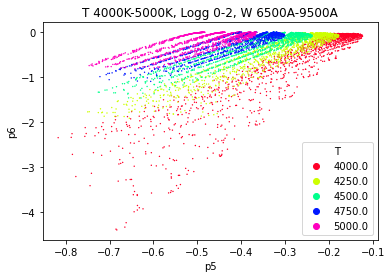

In [40]:
ds.p(5,6,"T")

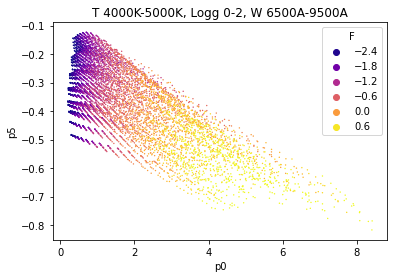

In [35]:
ds.p(0,5,"F")

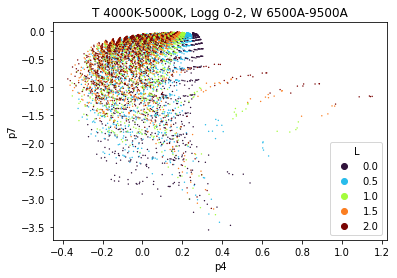

In [47]:
ds.p(4,7,"L")

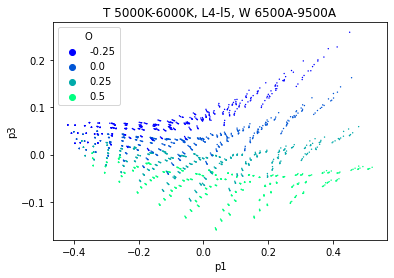

In [71]:
ds.p(1,3,"O")

In [ ]:
ds.p(0,4,"F")

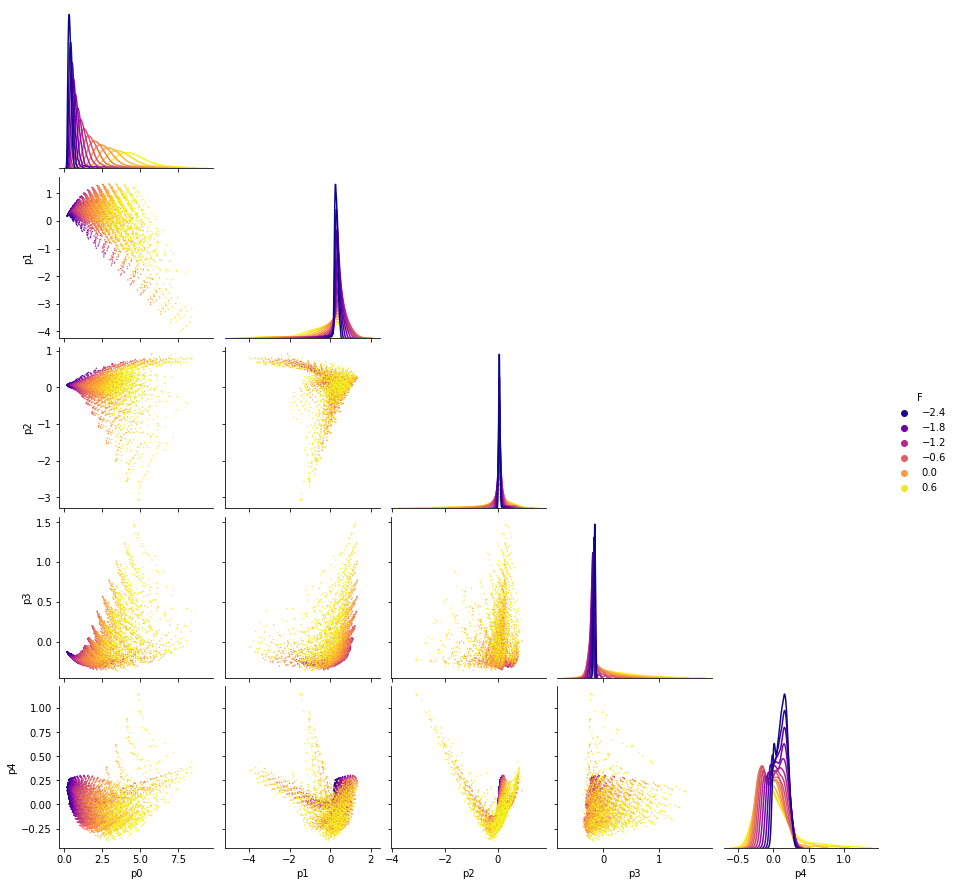

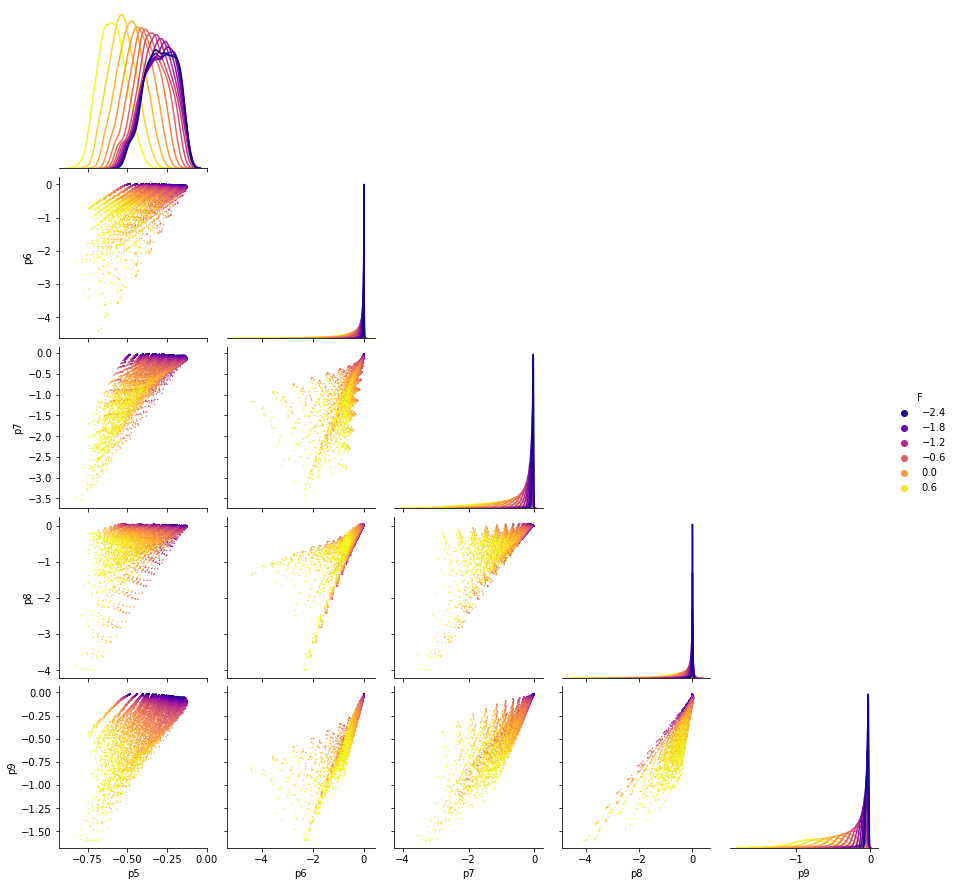

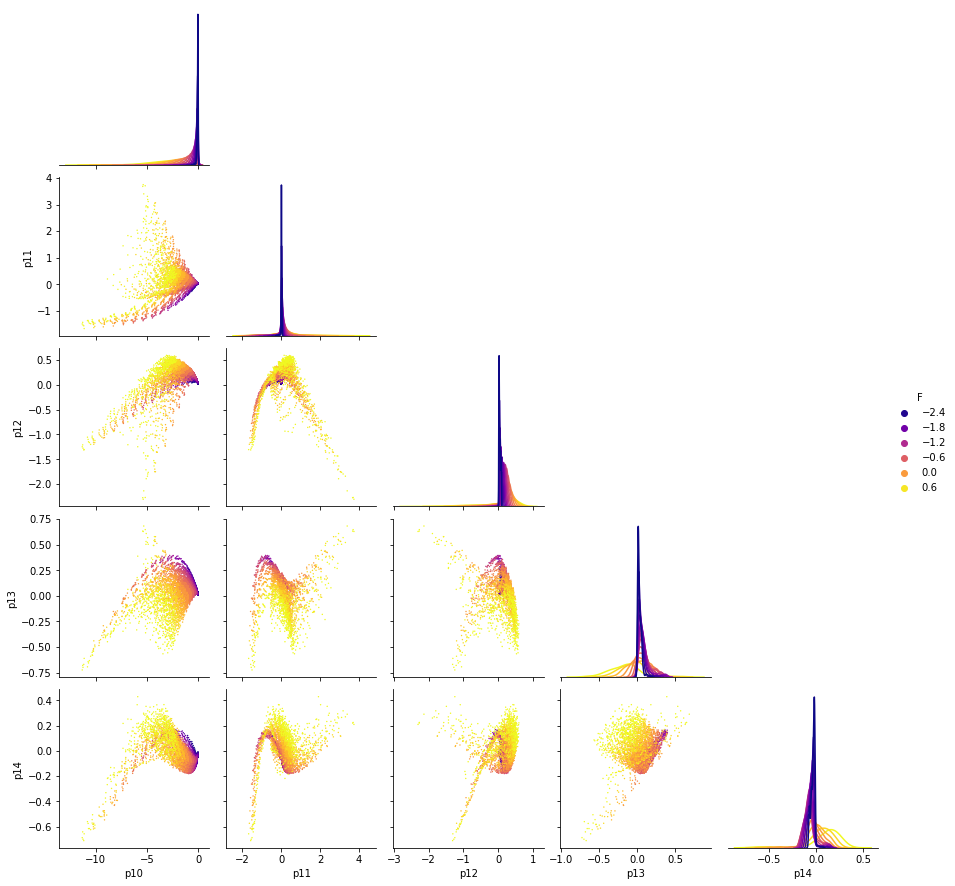

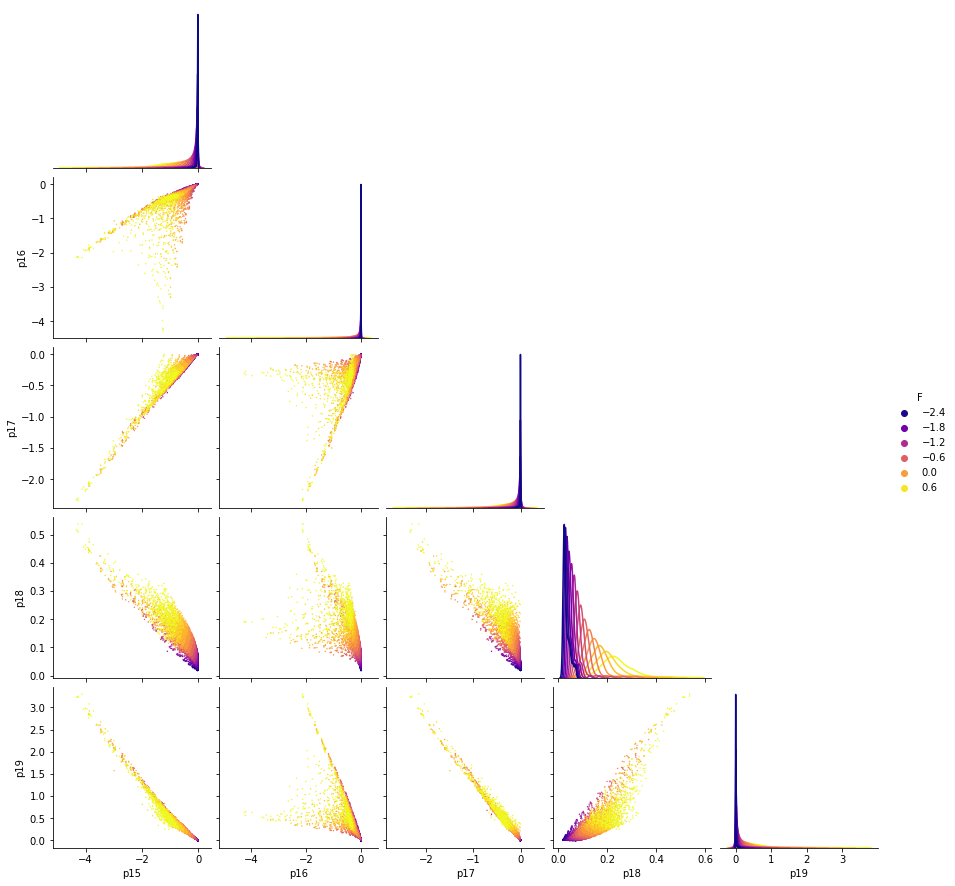

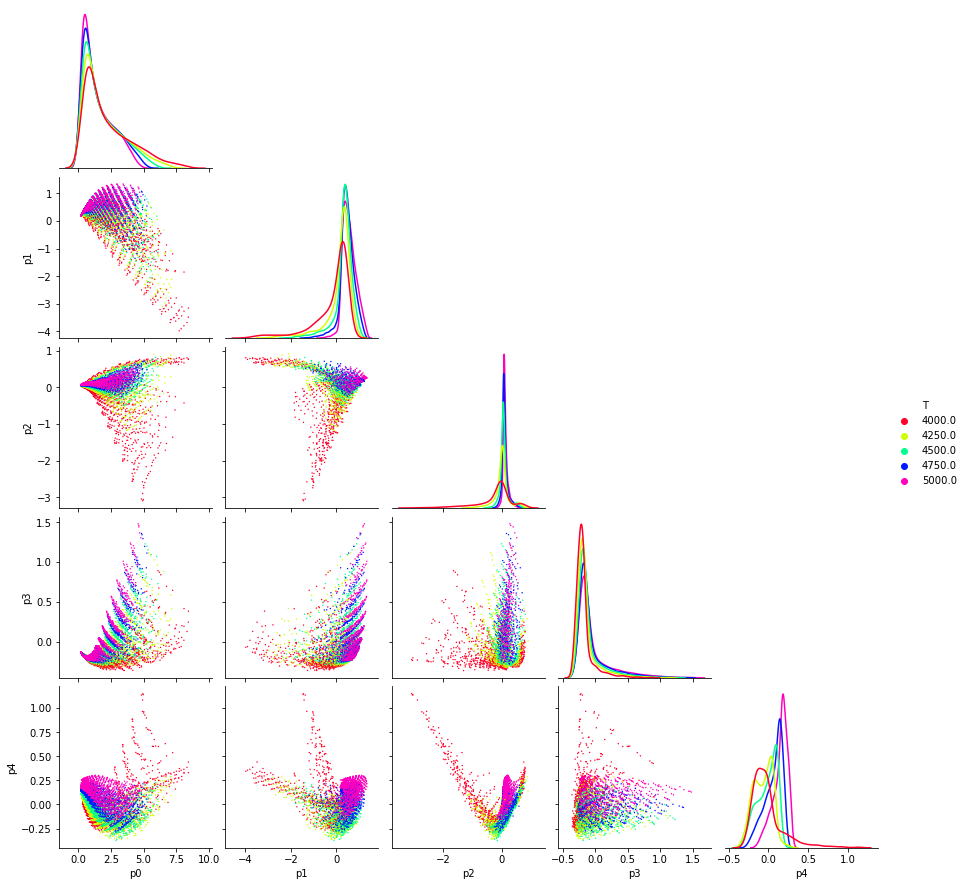

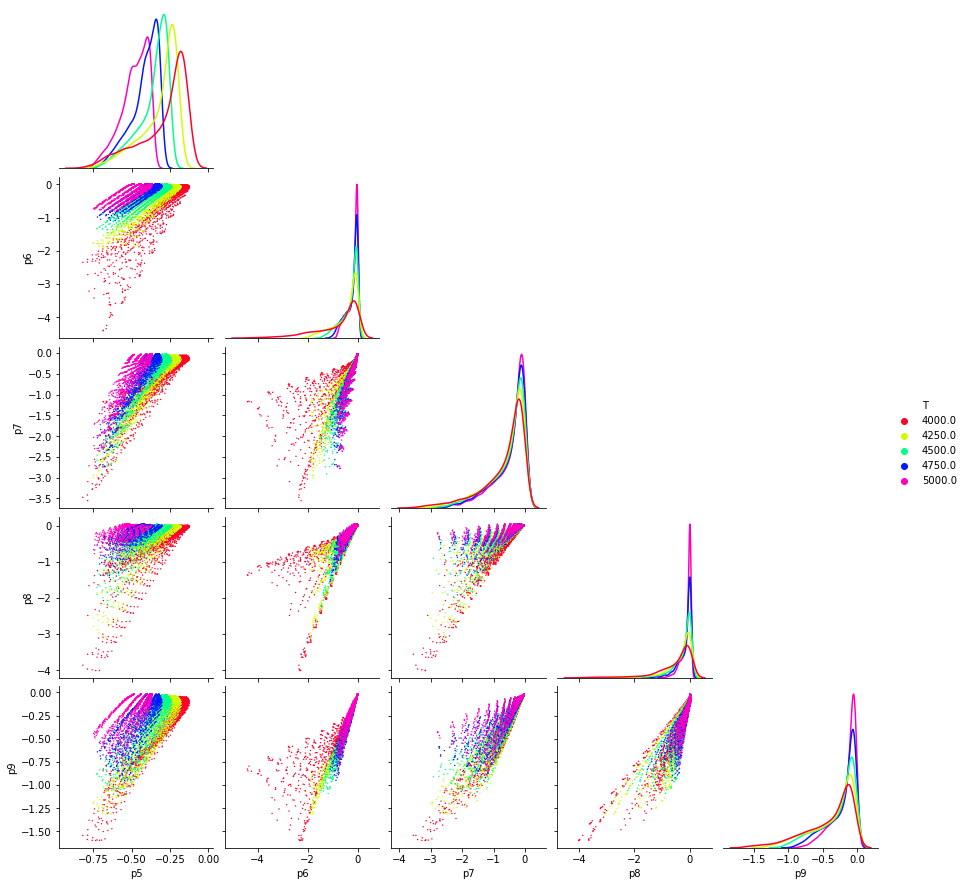

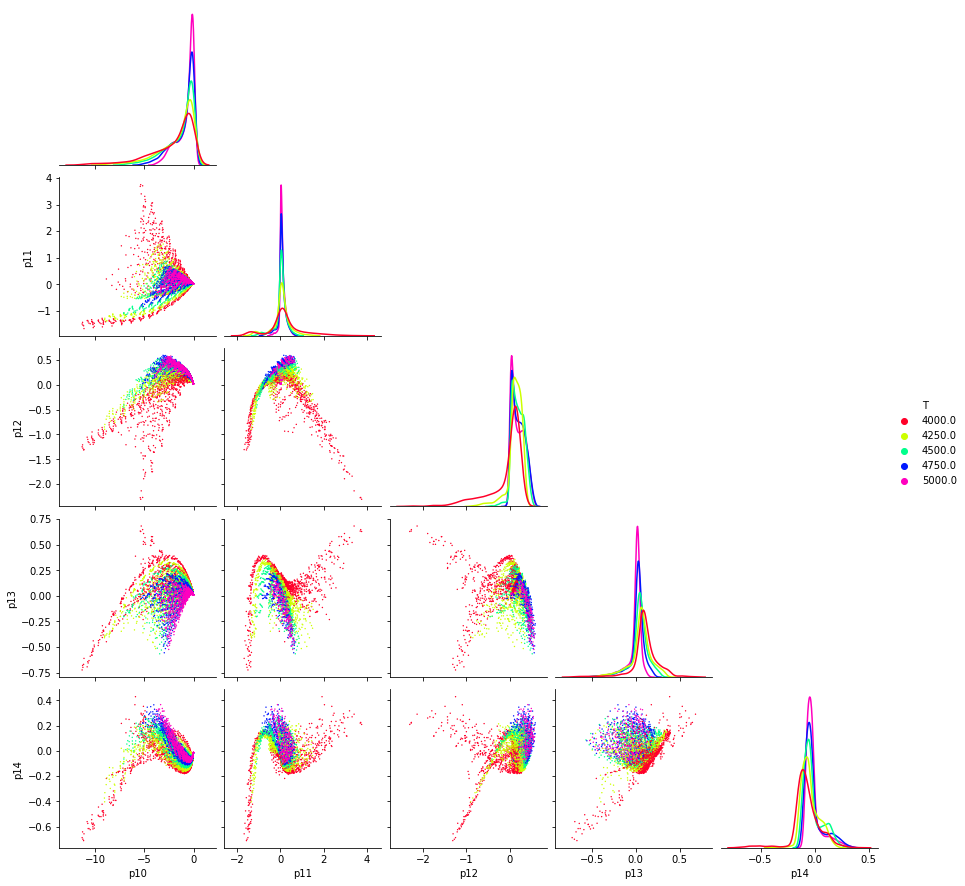

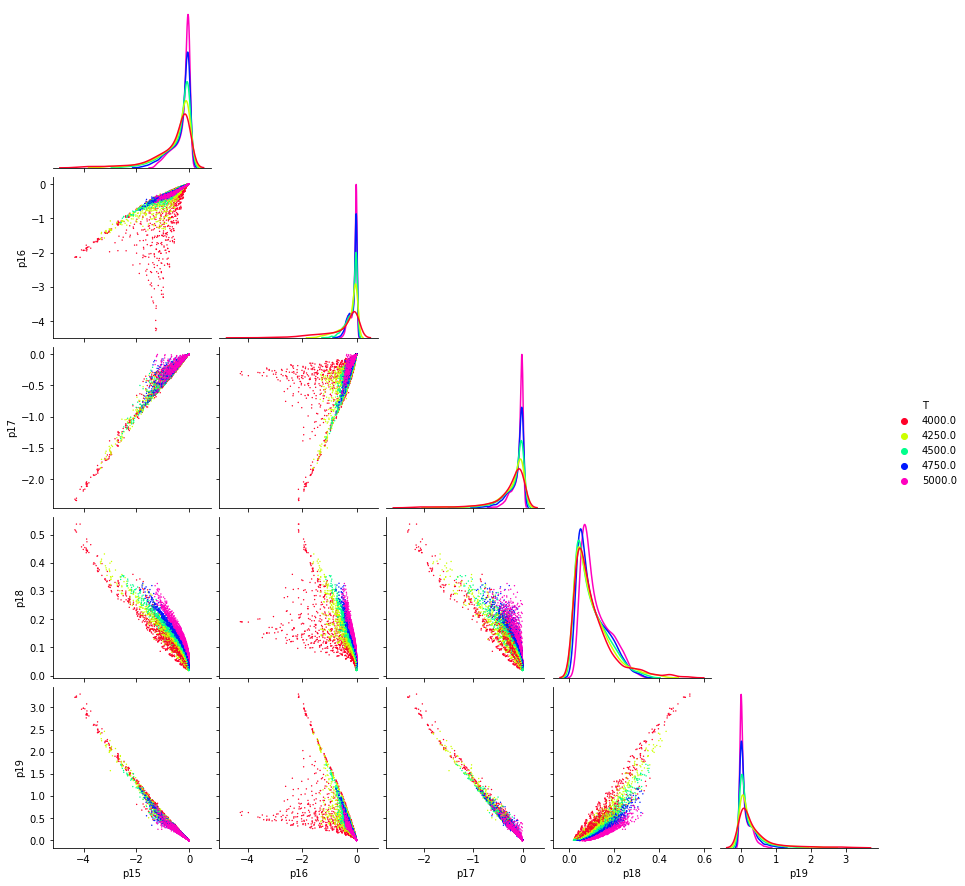

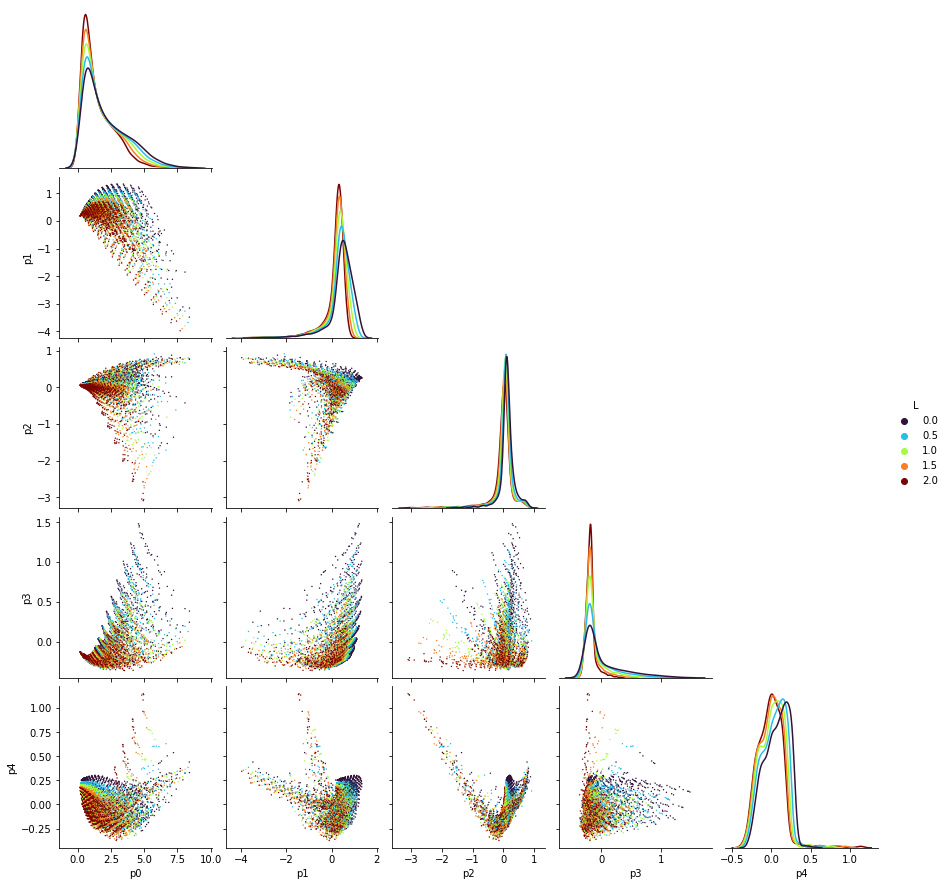

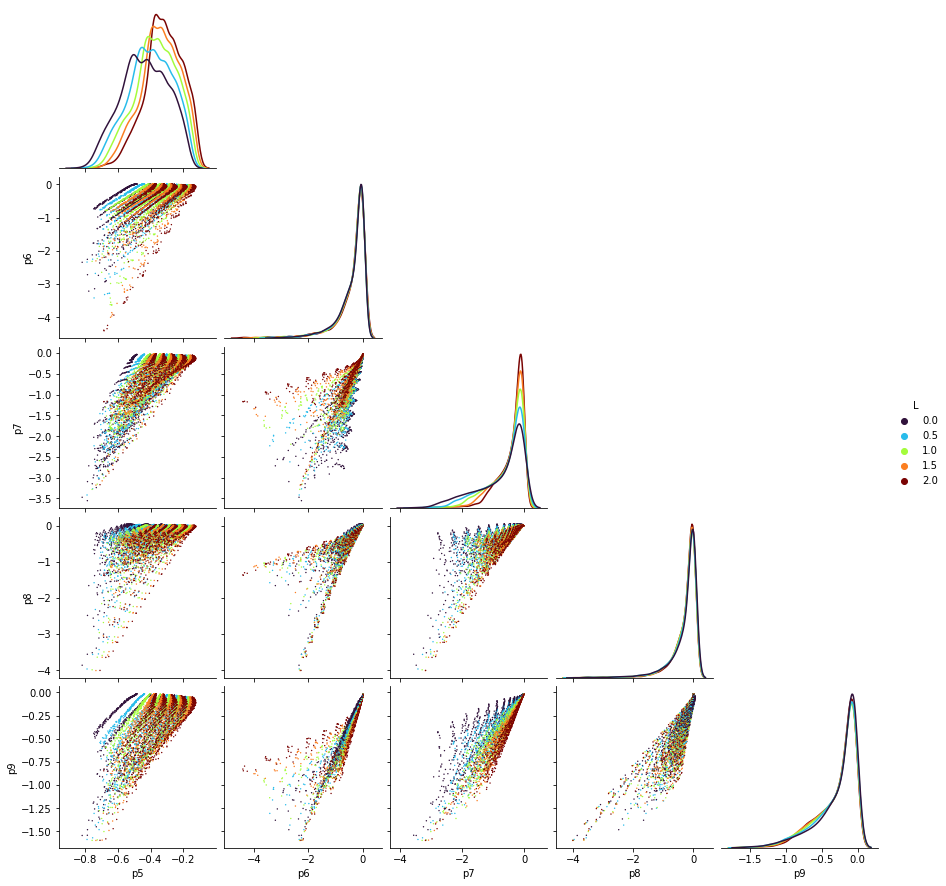

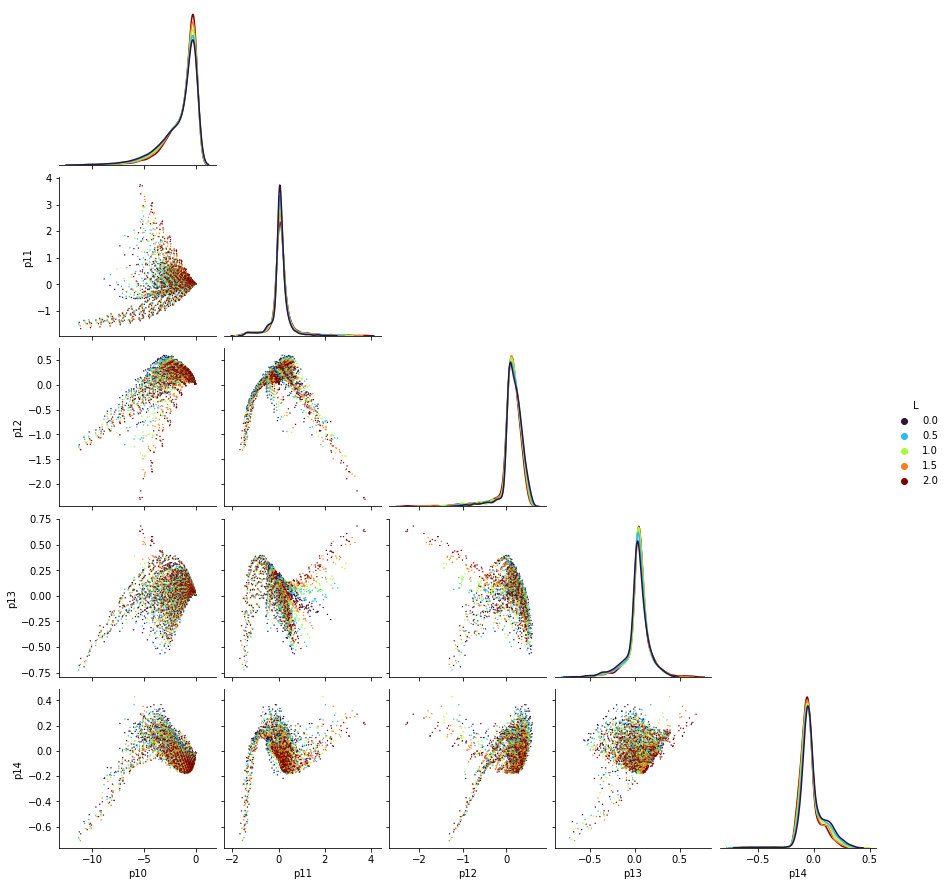

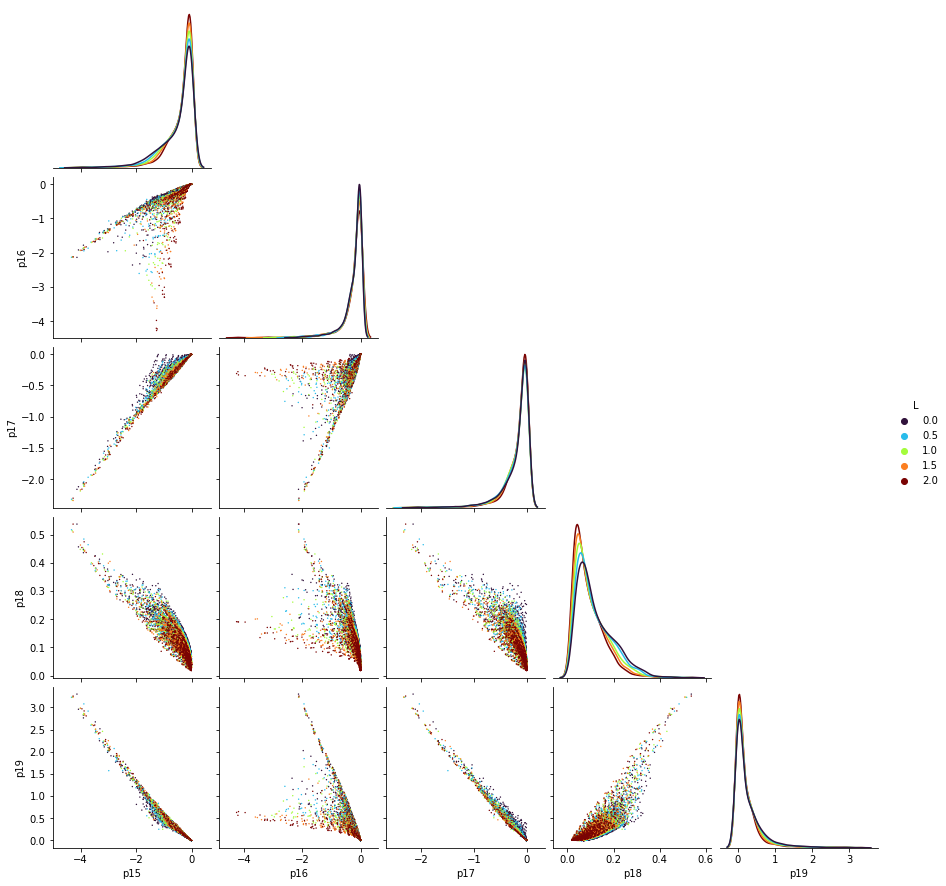

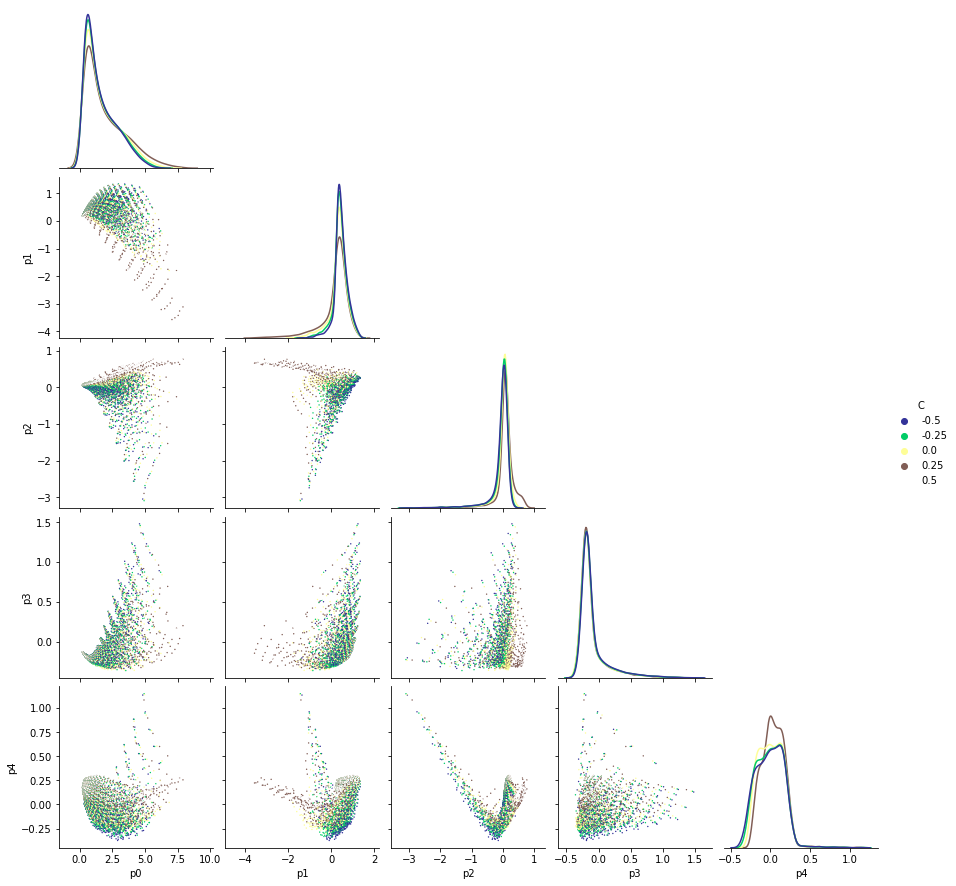

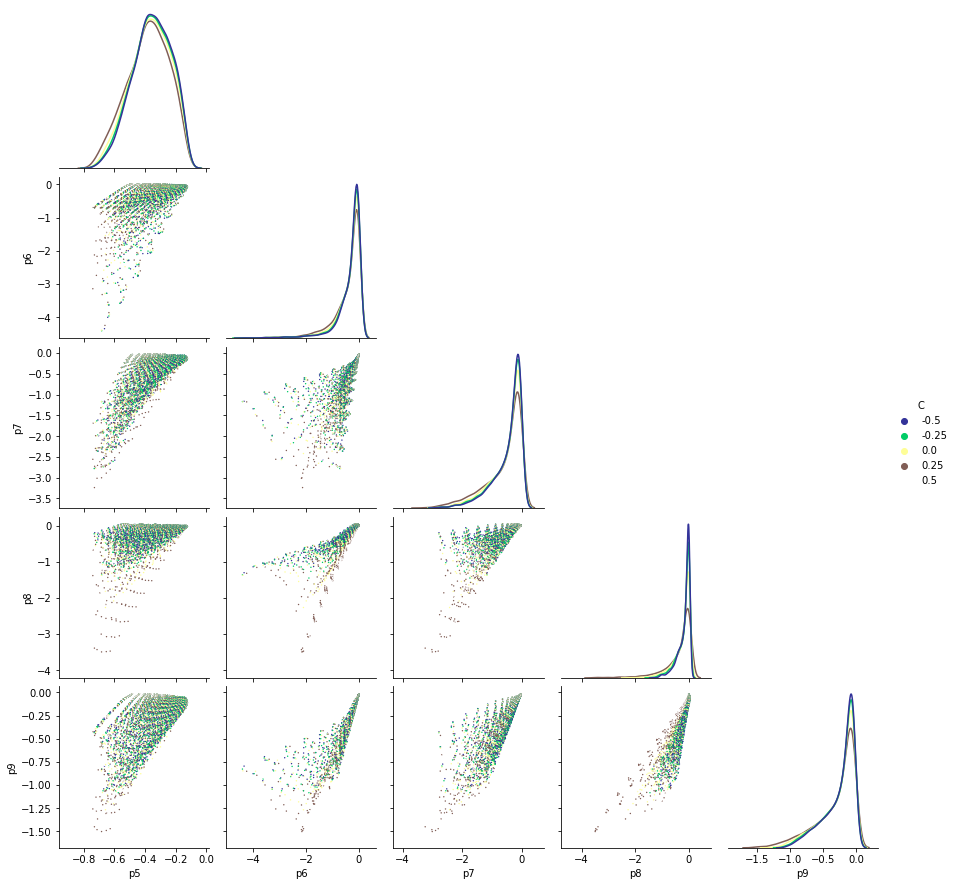

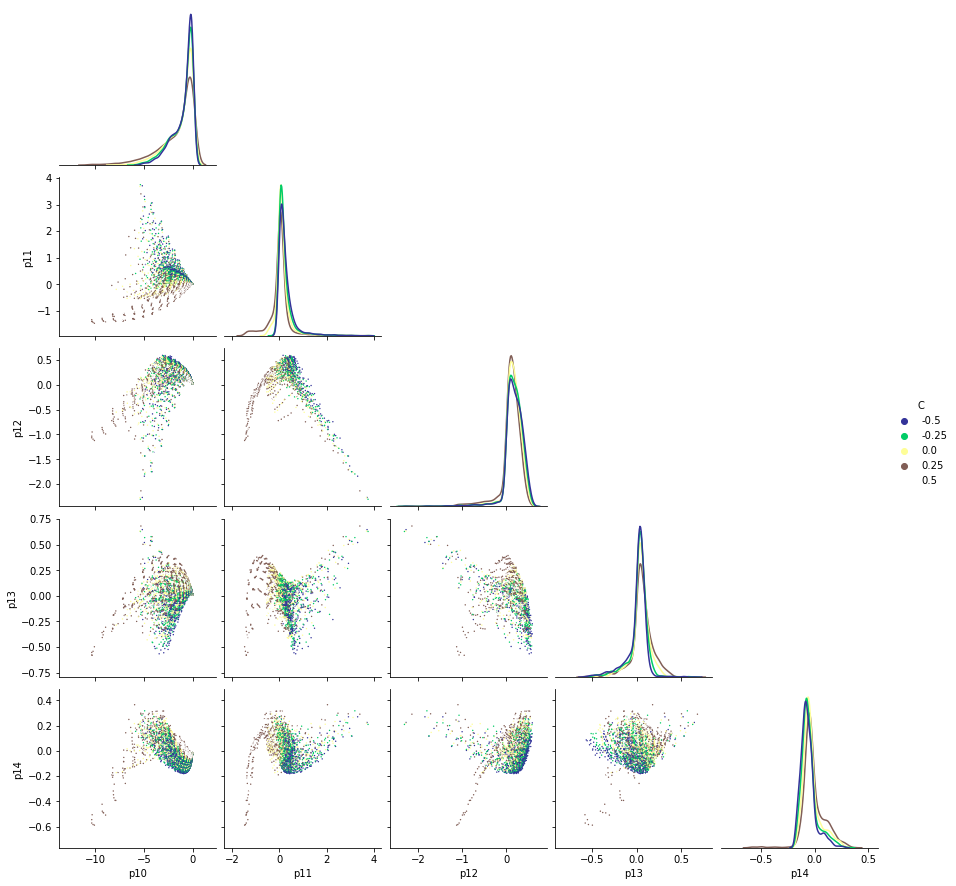

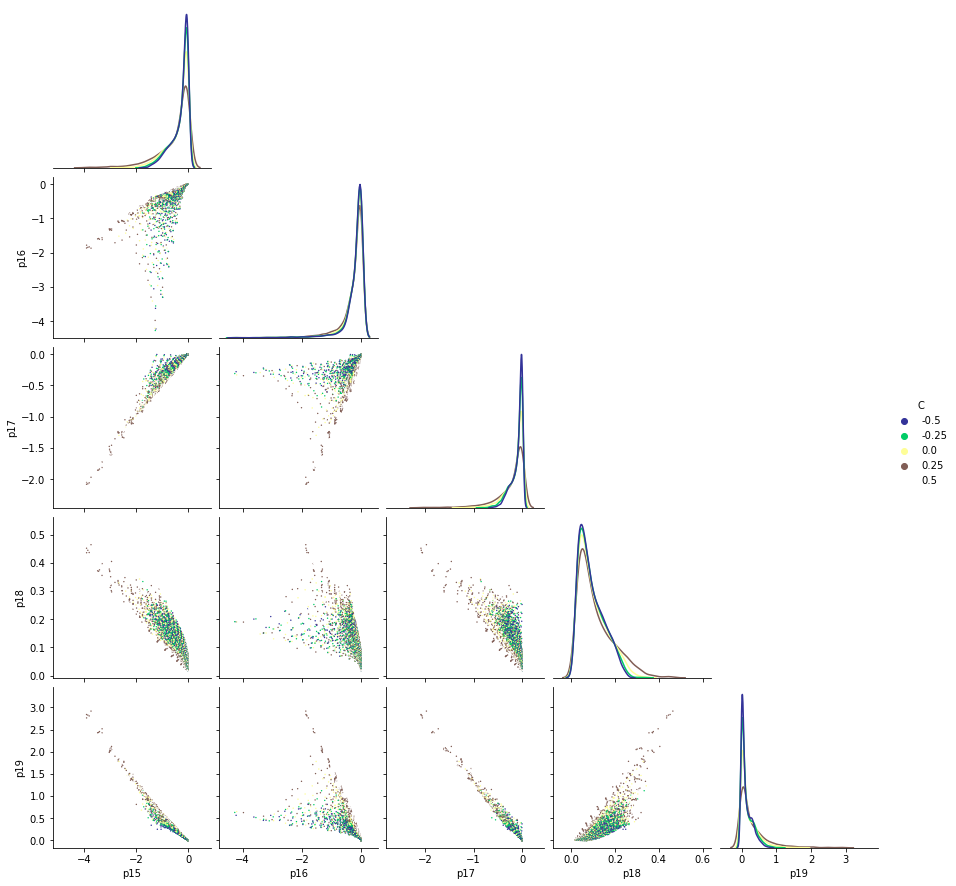

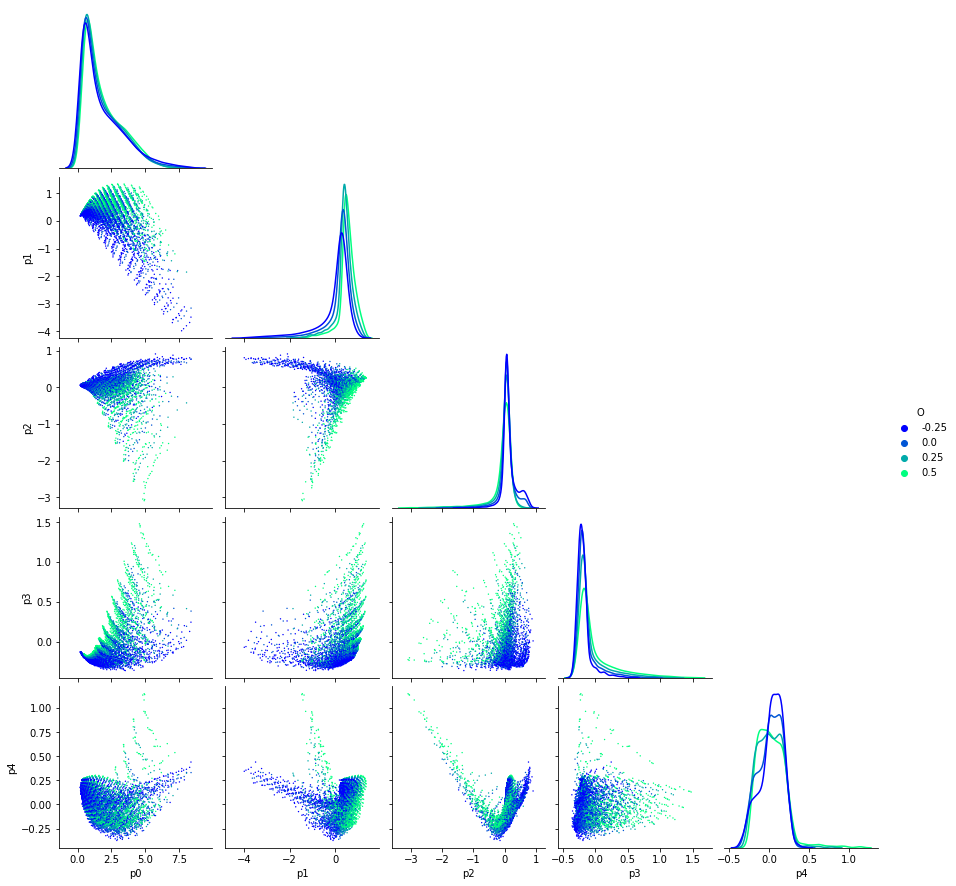

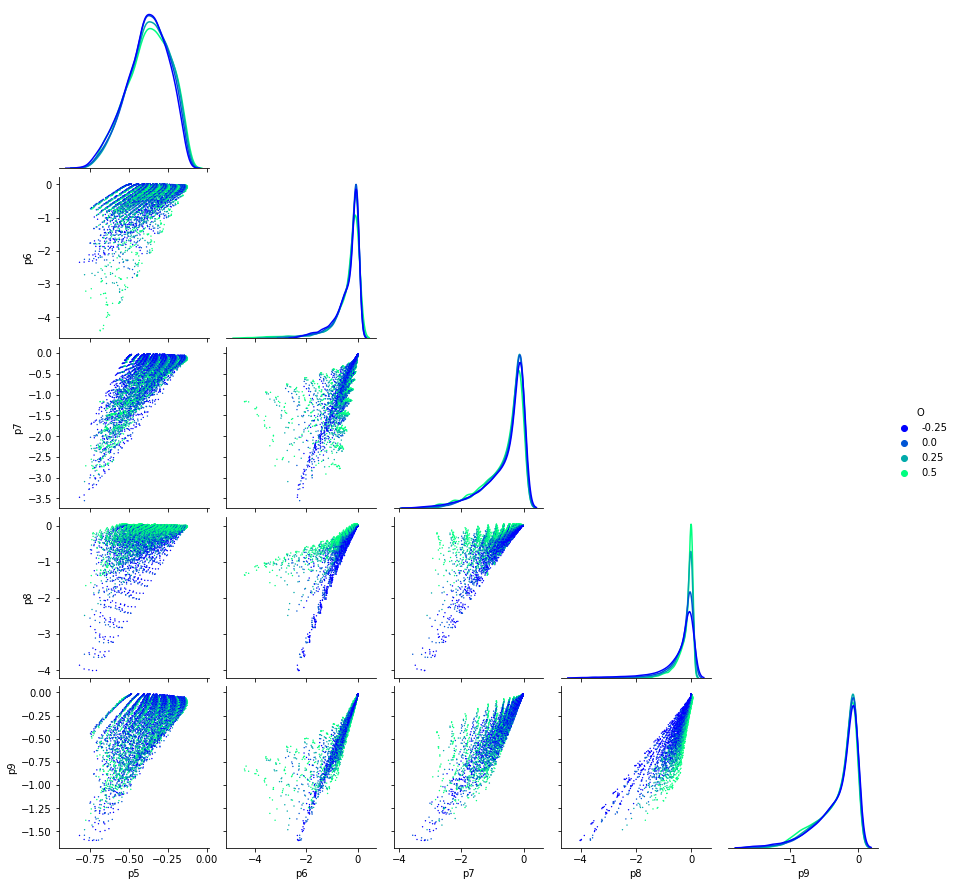

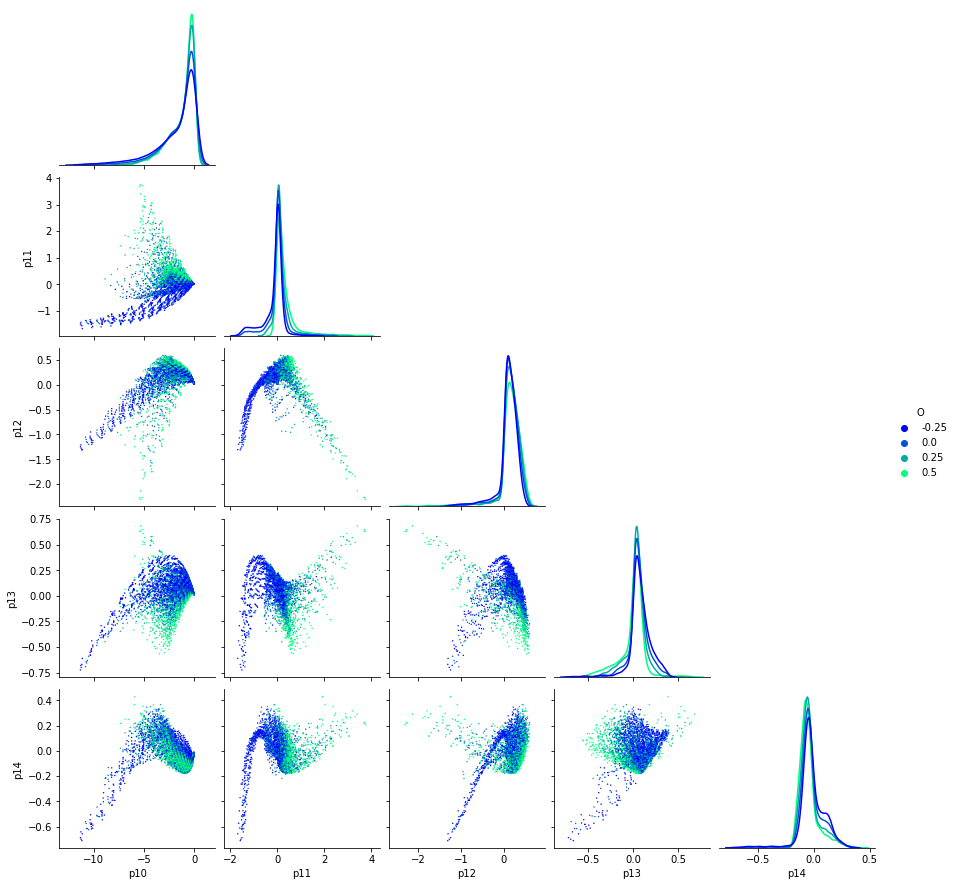

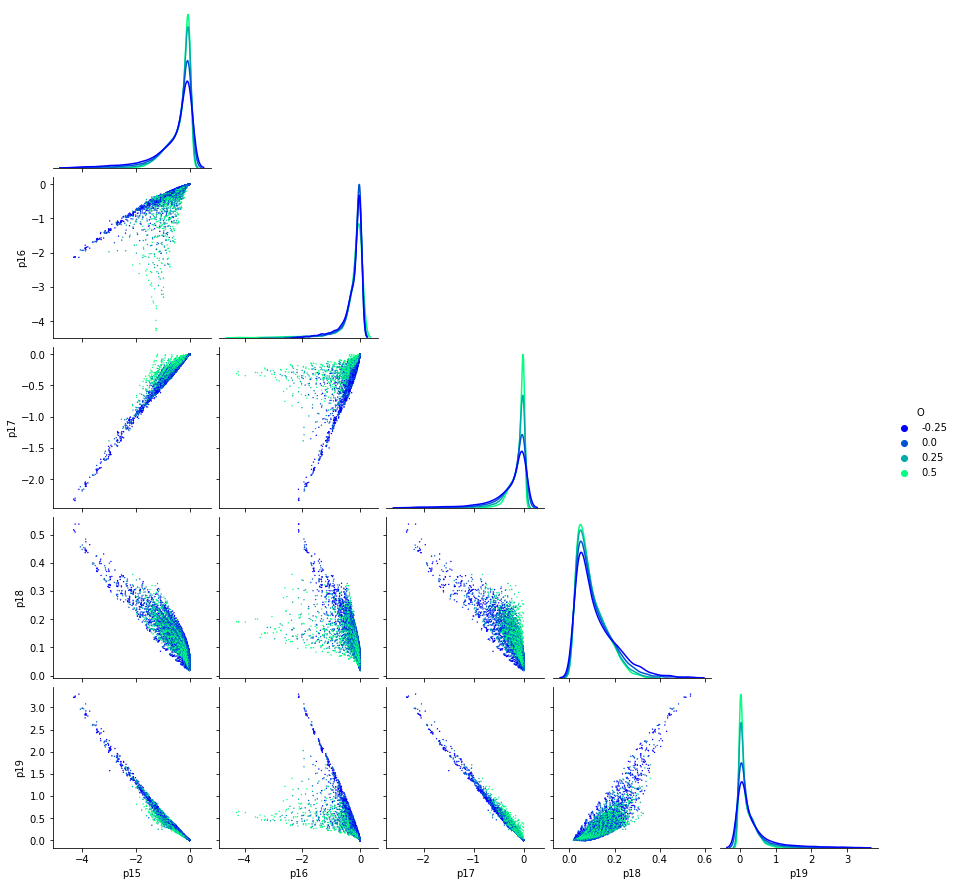

In [30]:
for p in ["F","T","L","C","O"]:
    for i in range(4):
        ds.pp(i, p)

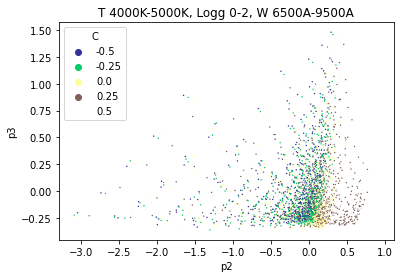

In [48]:
ds.p(2,3,"C")

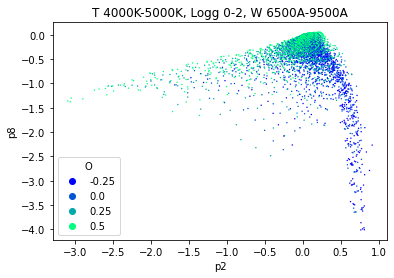

In [52]:
ds.p(2,8,"O")

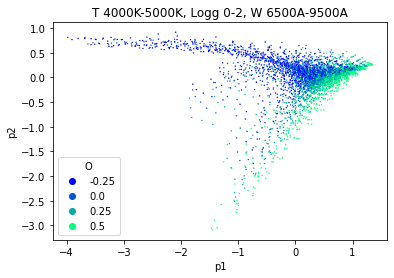

In [50]:
ds.p(1,2,"O")

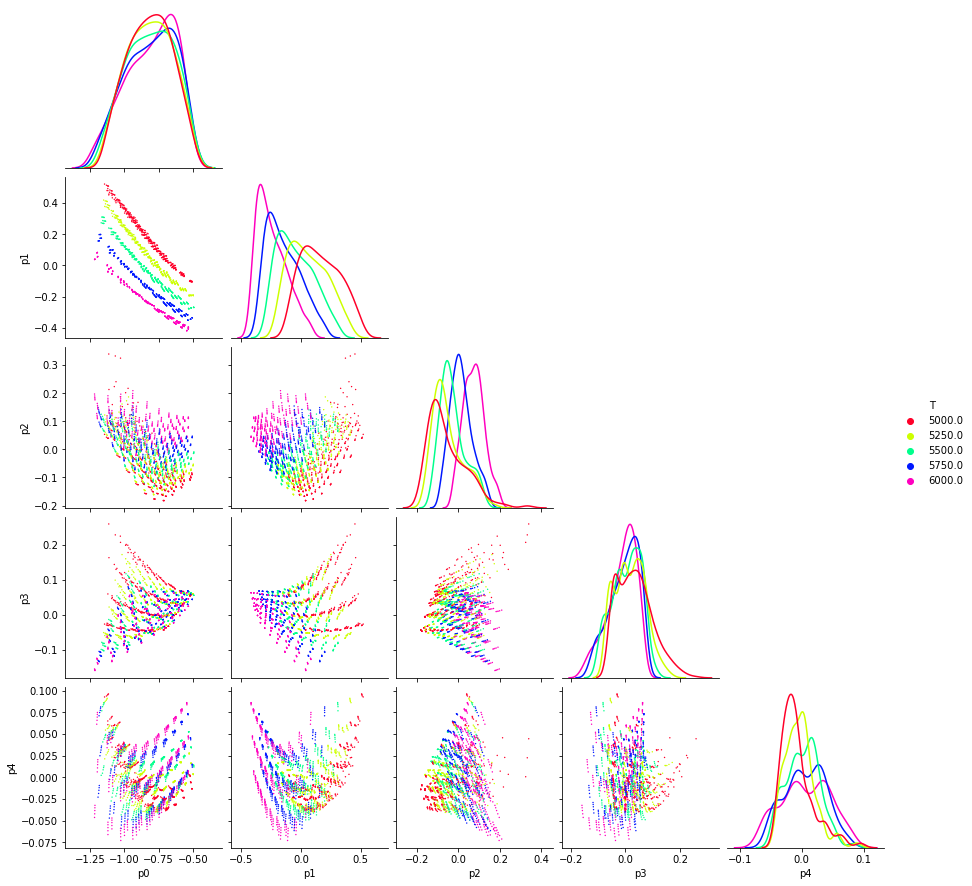

In [34]:
ds.pp(0, "T")

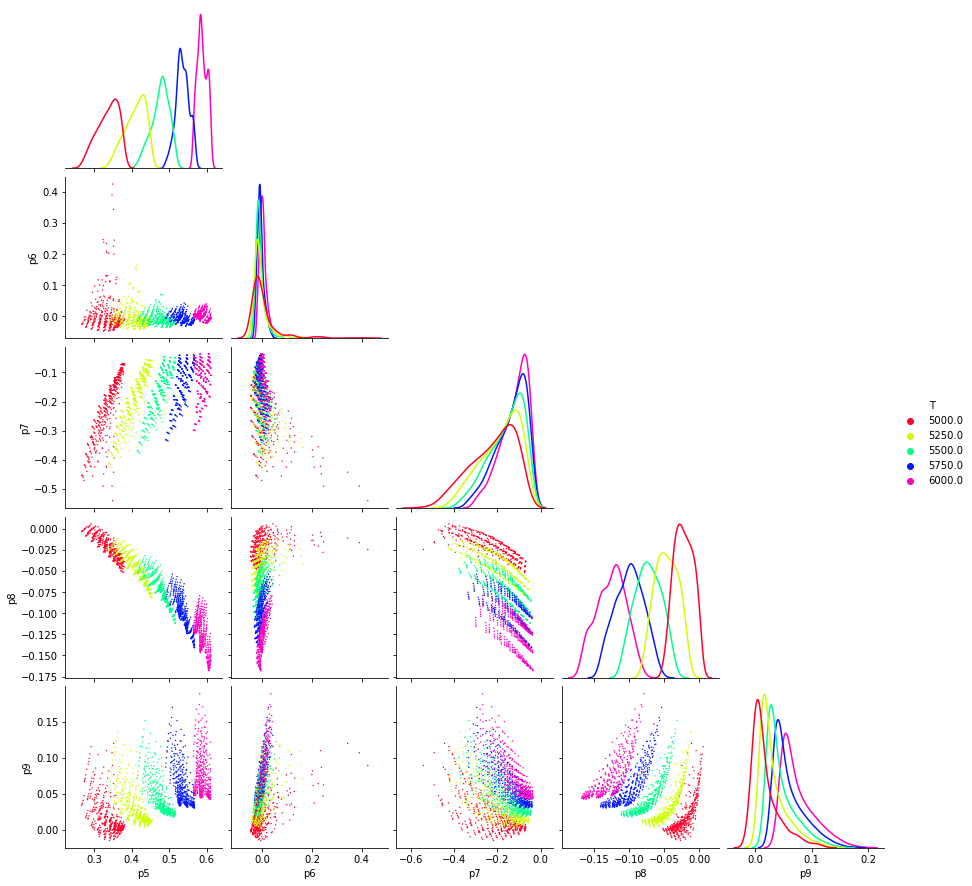

In [35]:
ds.pp(1, "T")

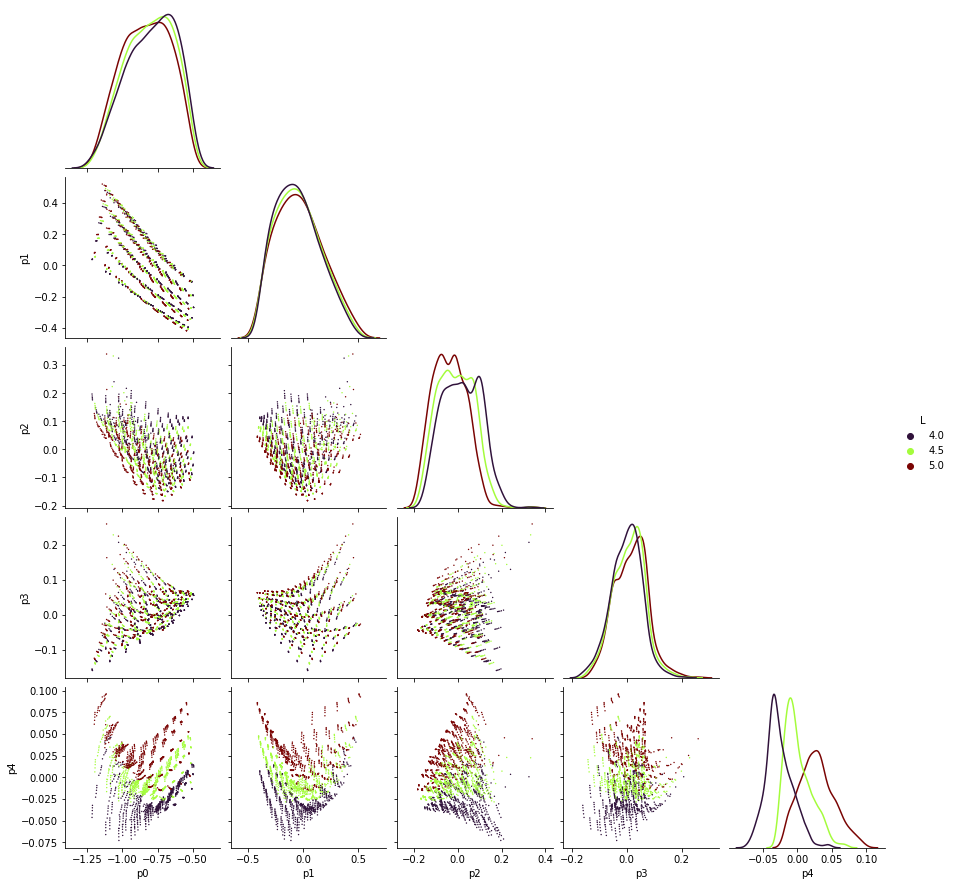

In [37]:
ds.pp(0, "L")

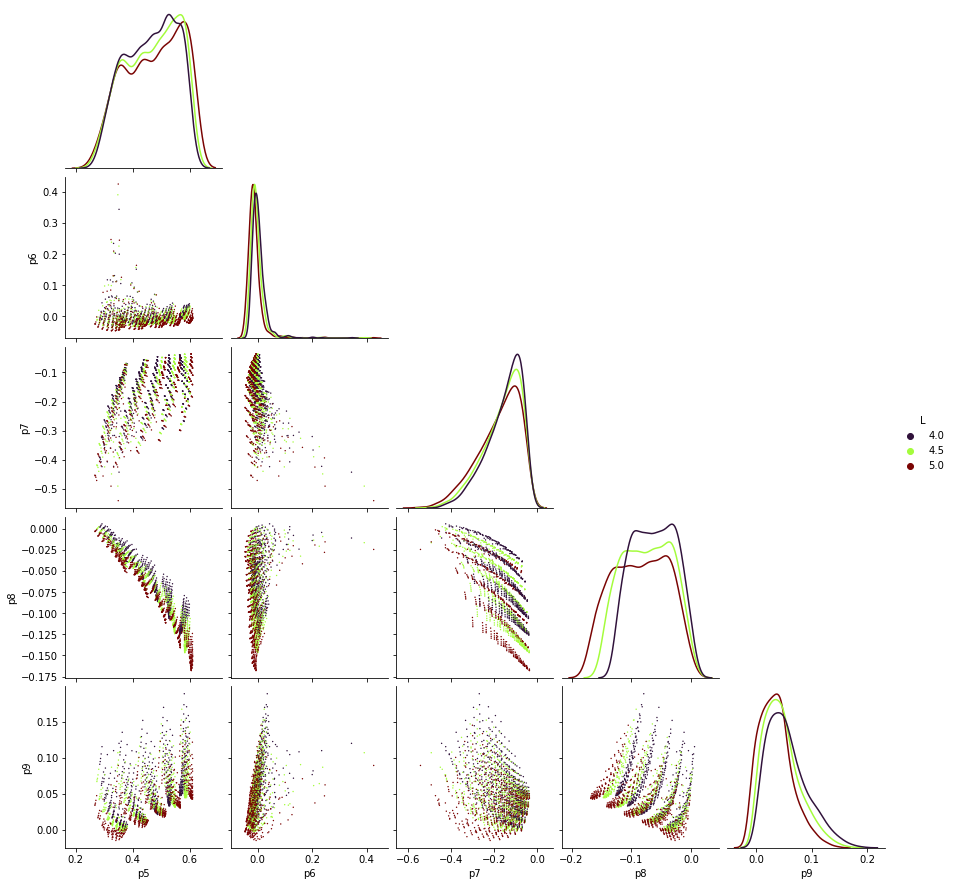

In [42]:
ds.pp(1, "L")

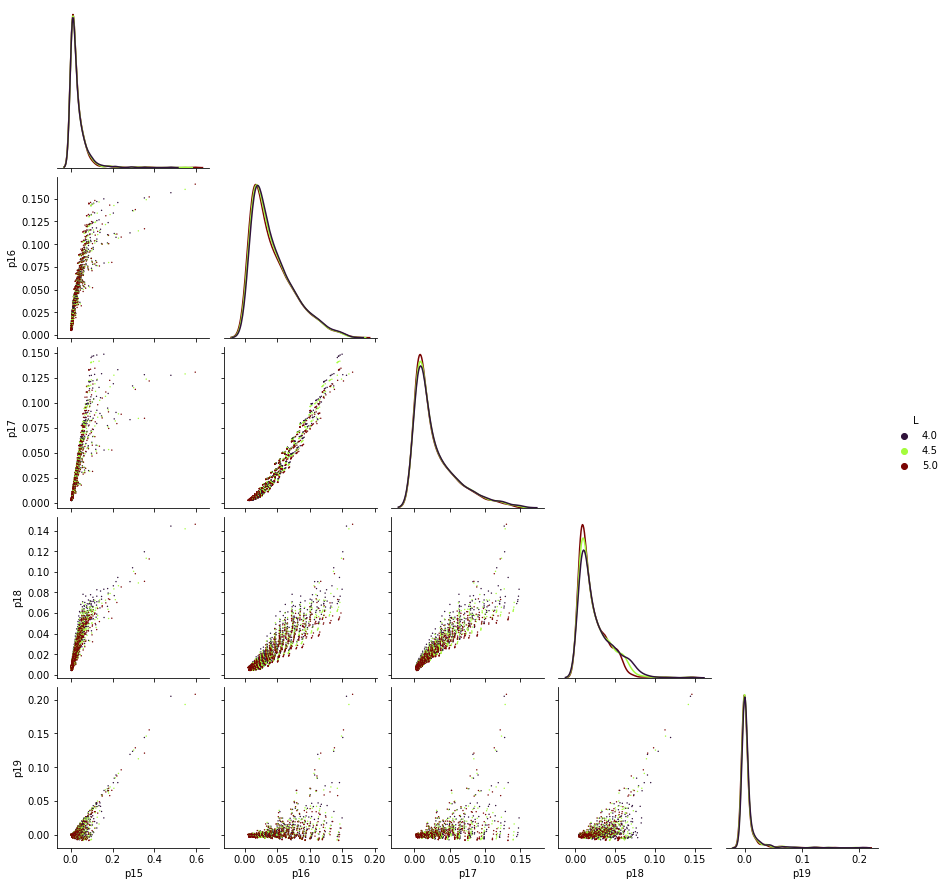

In [40]:

ds.pp(3, "L")

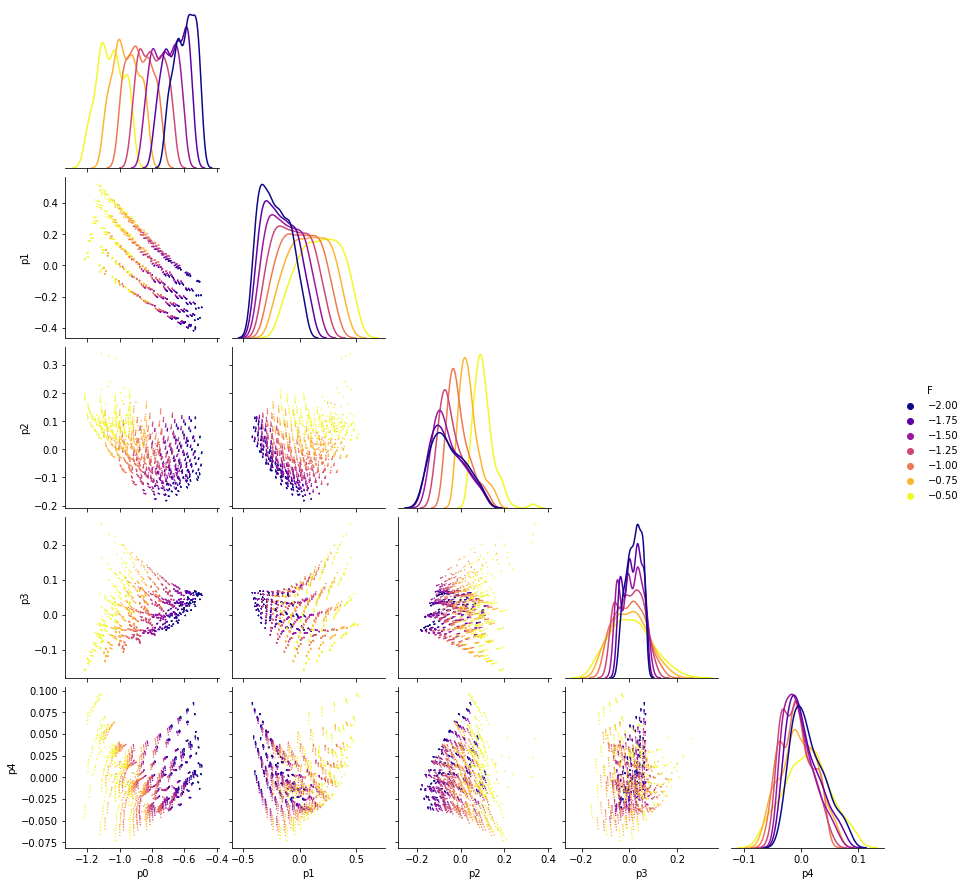

In [39]:
ds.pp(0, "F")

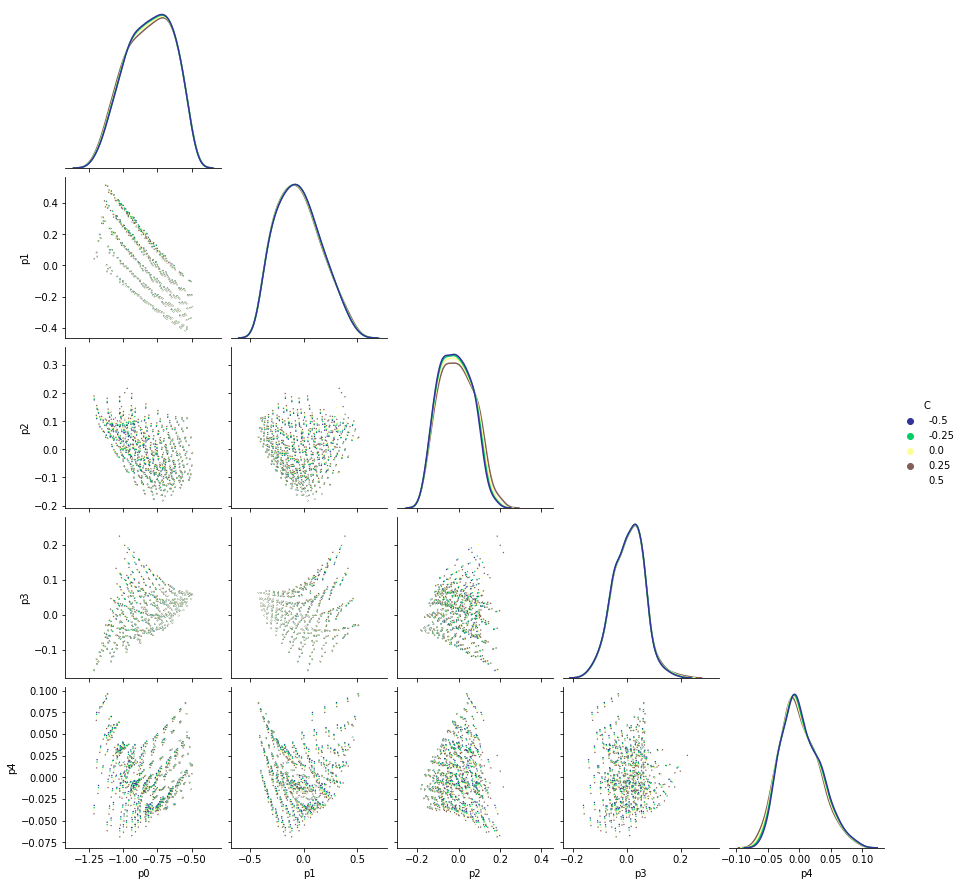

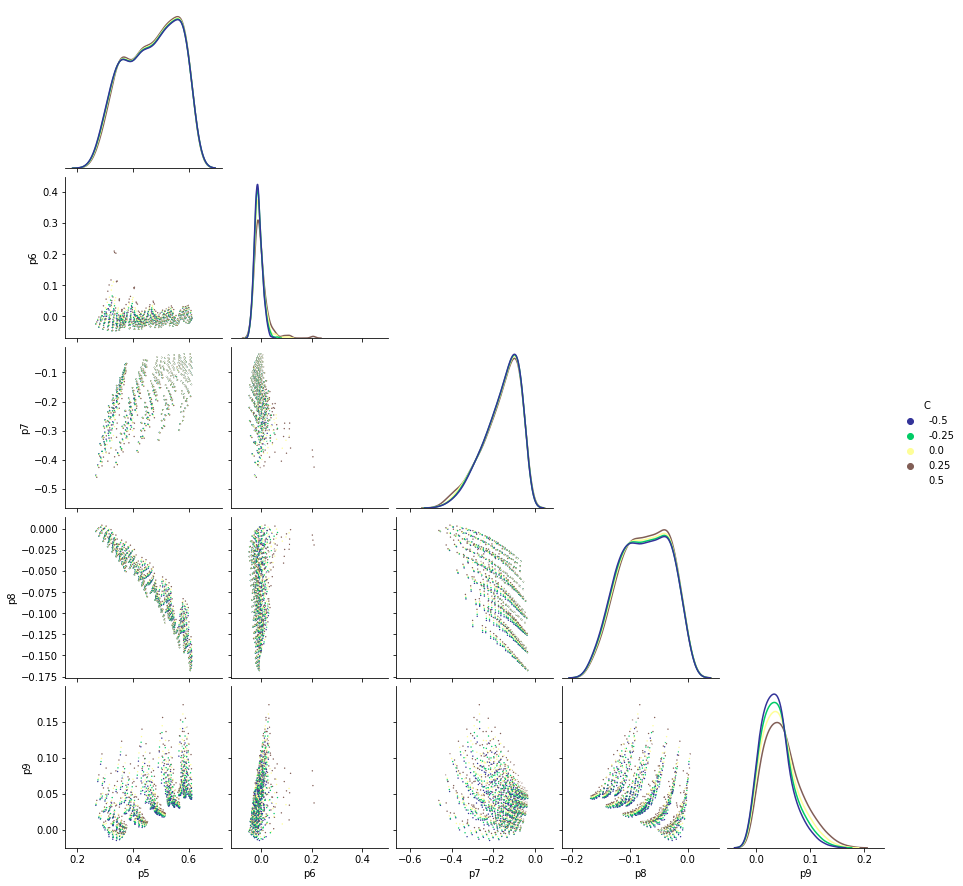

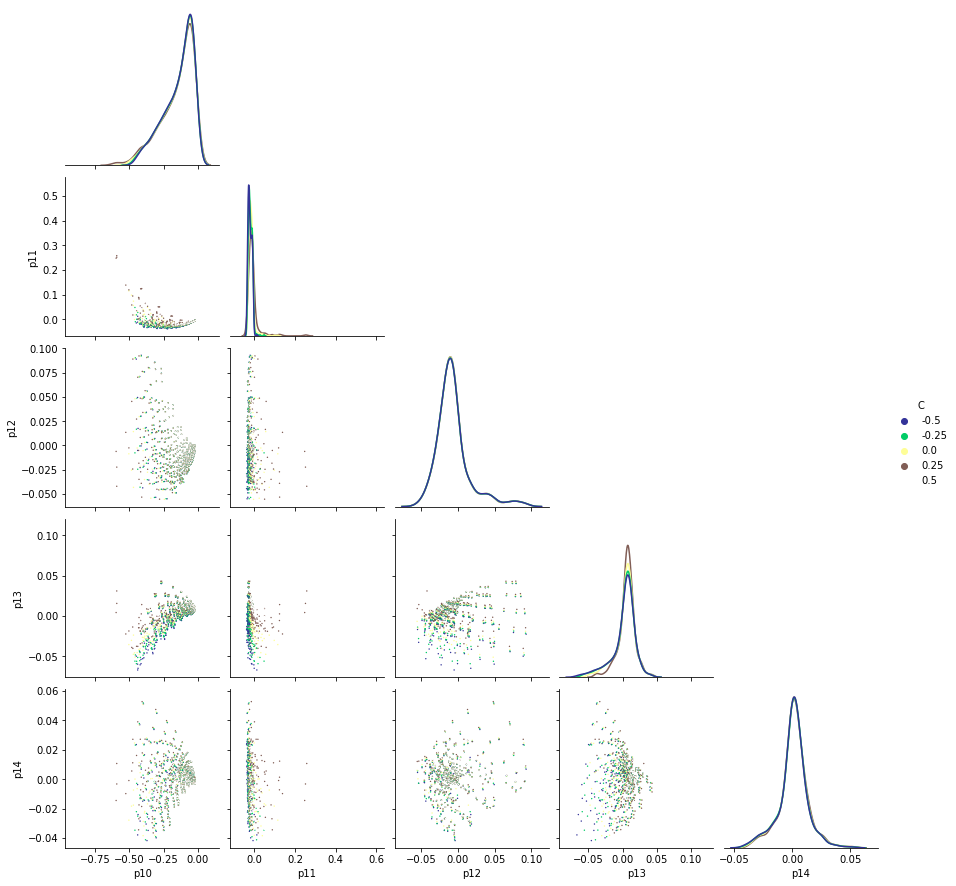

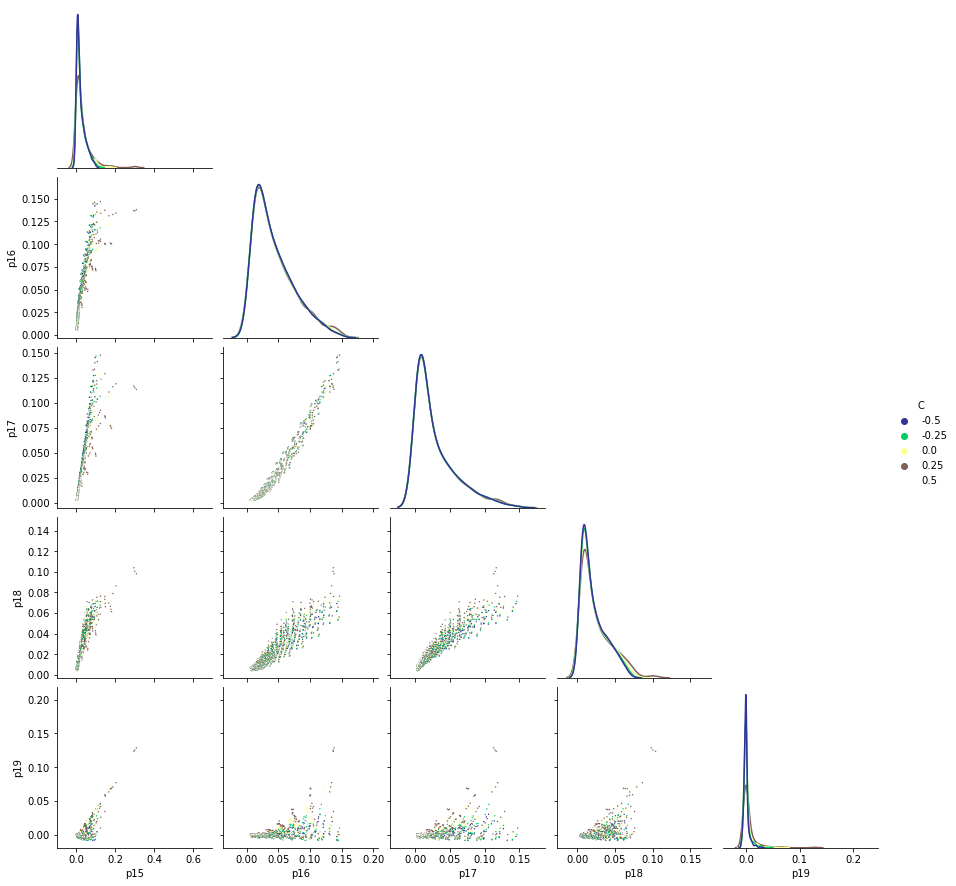

In [47]:
for i in range(4):
    ds.pp(i, "C")

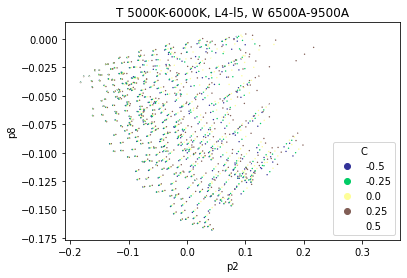

In [53]:
ds.p(2,8,"C")

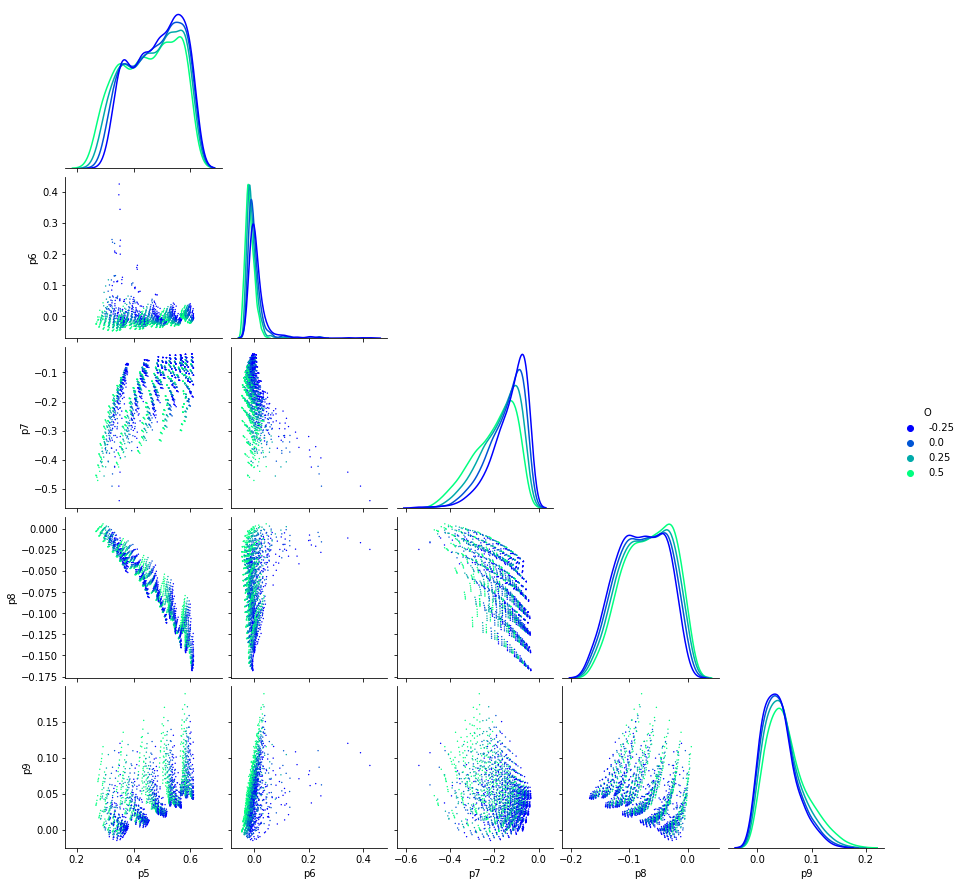

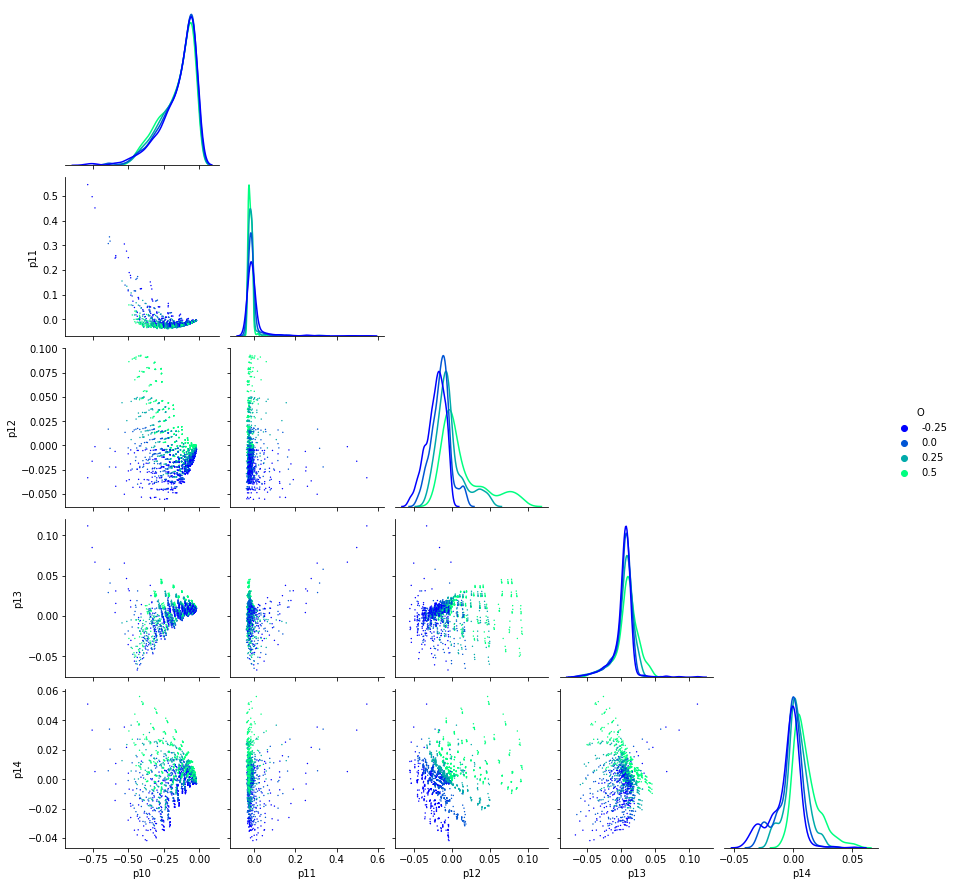

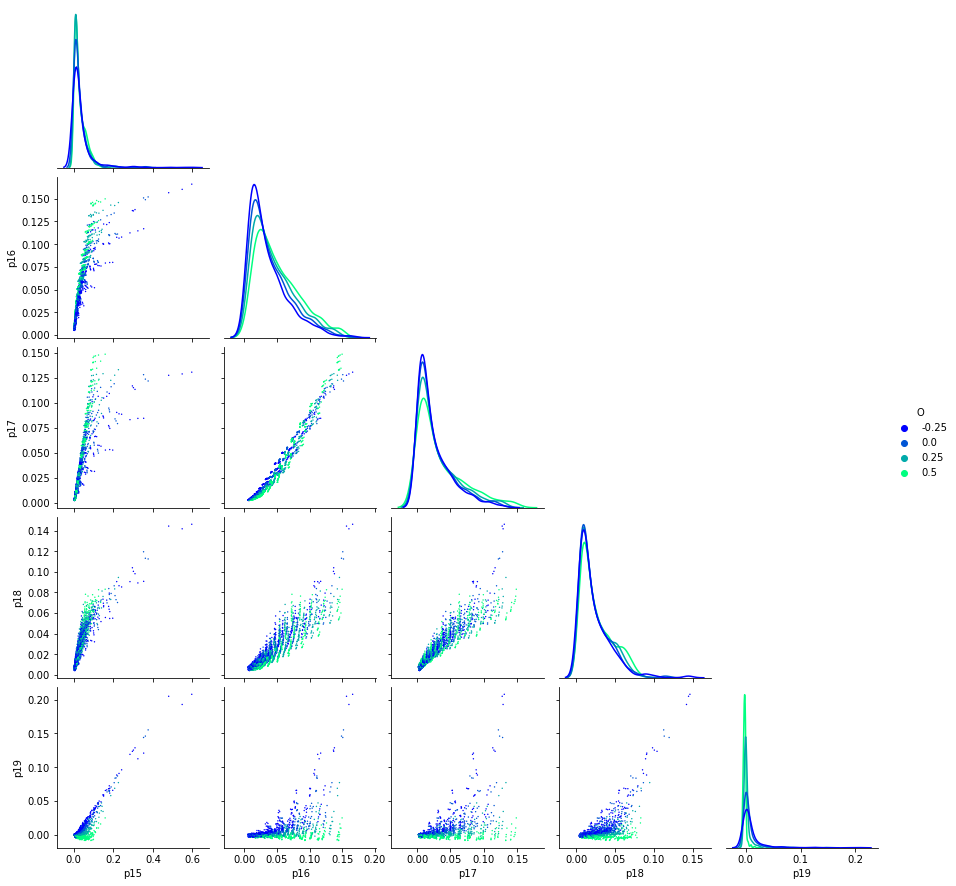

In [54]:
for i in range(1,4):
    ds.pp(i, "O")

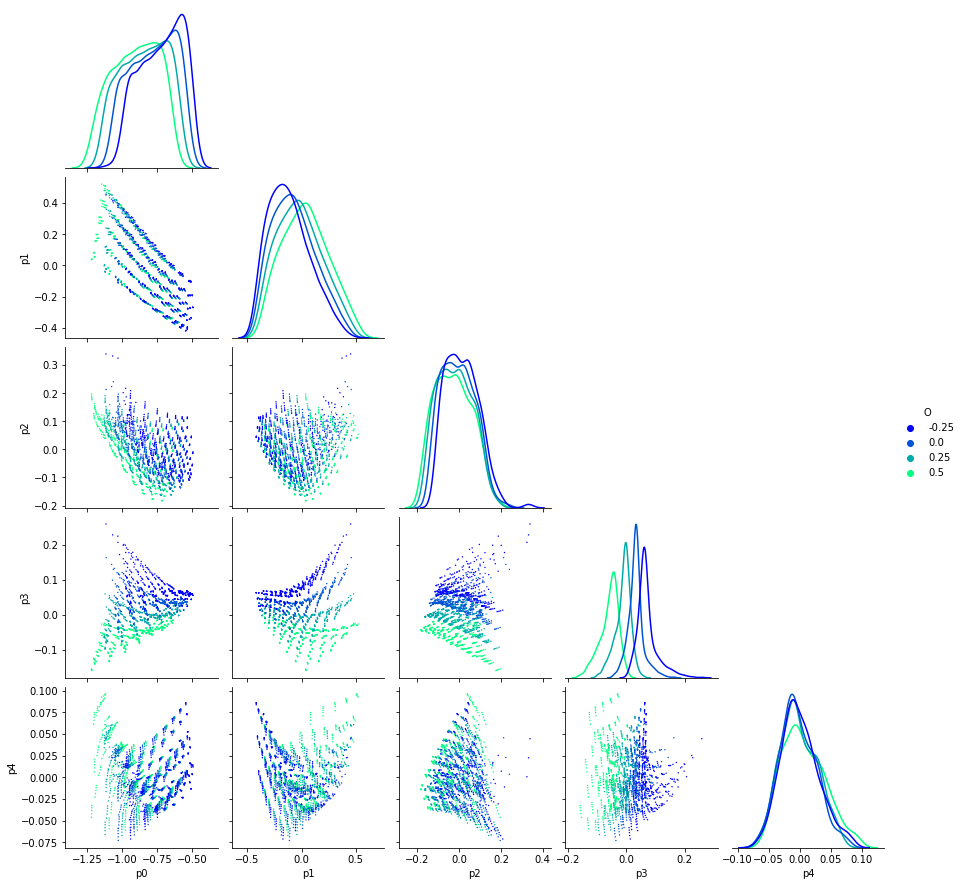

In [46]:
ds.pp(0, "O")